In [1]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn
from scipy.io import loadmat

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
#from tigramite.independence_tests.cmisymb import CMIsymb
#from tigramite.independence_tests.gsquared import Gsquared
#from tigramite.independence_tests.regressionCI import RegressionCI

In [2]:
u_data = loadmat('./inner_outer_u_z32_c2.mat')
data = u_data['data']
X = data
X = X[::100,:]
X -= X.mean(axis=0, keepdims=True)
X /= X.std(axis=0, keepdims=True)
X

array([[-0.45842297, -0.56994525],
       [-0.98870252, -0.96081233],
       [-2.28075109, -1.58609837],
       ...,
       [ 0.71746754, -1.39013066],
       [-0.25275355,  1.05511762],
       [-0.03774046,  1.52484348]])

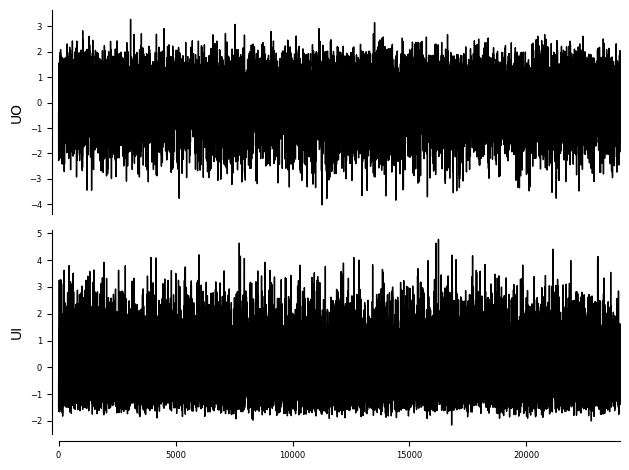

In [3]:
X.shape
df = pp.DataFrame(X, var_names=['UO', 'UI'])
tp.plot_timeseries(df); plt.show()

In [14]:
gpdc = GPDC(significance='analytic', gp_params=None)
pcmci_gpdc = PCMCI(
    dataframe=df, 
    cond_ind_test=gpdc,
    verbosity=0)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

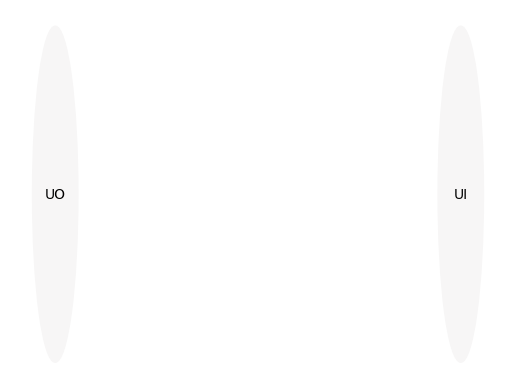

In [16]:
results = pcmci_gpdc.run_pcmci(tau_max=2, pc_alpha=0.1, alpha_level = 0.01)
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=['UO', 'UI'],
    show_colorbar=False,
    )

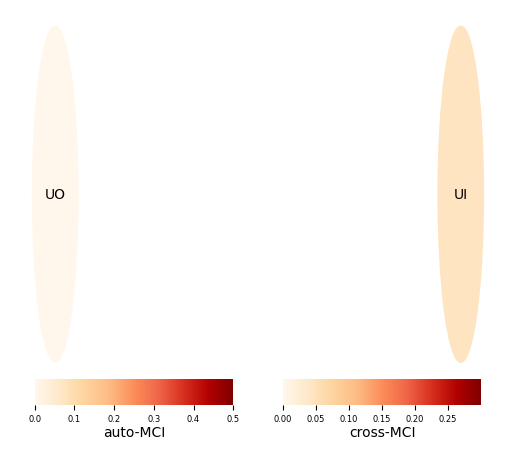

In [30]:
cmi_knn = CMIknn(significance='fixed_thres', model_selection_folds=3)
pcmci_cmi_knn = PCMCI(dataframe=df, cond_ind_test=cmi_knn, verbosity=0)
results = pcmci_cmi_knn.run_pcmciplus(tau_max=10, pc_alpha=0.05)  
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=['UO', 'UI'],
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    vmin_edges=0.,
    vmax_edges = 0.3,
    edge_ticks=0.05,
    cmap_edges='OrRd',
    vmin_nodes=0,
    vmax_nodes=.5,
    node_ticks=.1,
    cmap_nodes='OrRd',
    ); plt.show()